<a href="https://colab.research.google.com/github/LokeshUpputri/Predictive-Maintenance-of-Automotive-Engines/blob/main/Project_Automotive_Vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This project aims to develop a predictive maintenance system for automotive engines using
machine learning techniques. Based on the available dataset columns (Engine rpm, Lub oil pressure, Fuel pressure,
Coolant pressure, Lub oil temp, Coolant temp, Engine Condition), we will focus on two key
problem statements that are straightforward to implement and provide valuable insights:

1. **Engine Condition Classification:**
  - Develop a system that classifies an engine's condition as "Normal" or
  "Abnormal" based on sensor readings.
  - This classification model will serve as an early warning system to alert
  maintenance teams when an engine’s operational parameters suggest potential
  issues.

2. **Parameter Relationship Analysis and Anomaly Detection:**
  - Build a regression model to predict one critical parameter (e.g., Lub oil
  pressure) based on other sensor readings.
  - Detect anomalies by flagging cases where the actual parameter value
  significantly deviates from the predicted value, indicating a potential developing
  fault.

# **Part A: Data preparation and analysis**

# Step 1: Import Required Libraries
We import necessary libraries for:
- Data manipulation (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- Machine Learning (Scikit-learn)

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_fscore_support,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

# Step 2: Load and Explore Dataset
- Load dataset into Pandas DataFrame.
- Display first few rows, check for missing values, and column data types.

In [81]:
# Load dataset
df = pd.read_csv("engine_data.csv")

# Display first few rows
df.head()

# Display dataset information
df.info()

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate records
duplicate_count = df.duplicated().sum()


# Show results
print("\nMissing values: ")
print(missing_values)
print("\nDuplicate values: ", duplicate_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB

Missing values: 
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

Duplicate values:  0


# Step 3: Exploratory Data Analysis (EDA)
- Summary statistics.
- Correlation heatmap.
- Pairplot for feature relationships.

In [82]:
# Summary statistics
summary_stats = df.describe()
print("\nSummary analysis:")
print(summary_stats)


Summary analysis:
         Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  
count  19535.000000  19535.000000      19535.000000  
mean      77.643420     78.427433          0.630509  
std        3.110984      6.206749          0.482679  
min       71.321974     61.673325          0.000000  
25%       75.725990     73.895421          0

<Figure size 1200x800 with 0 Axes>

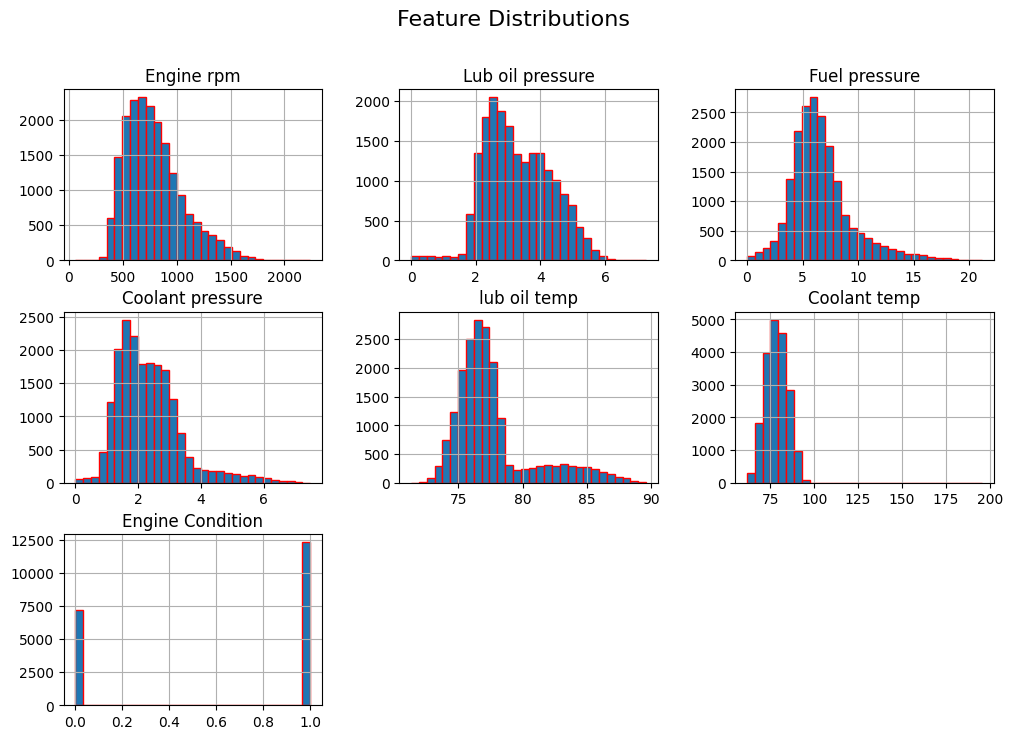

In [83]:
# Plot distributions of numerical features
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=30, edgecolor='red')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

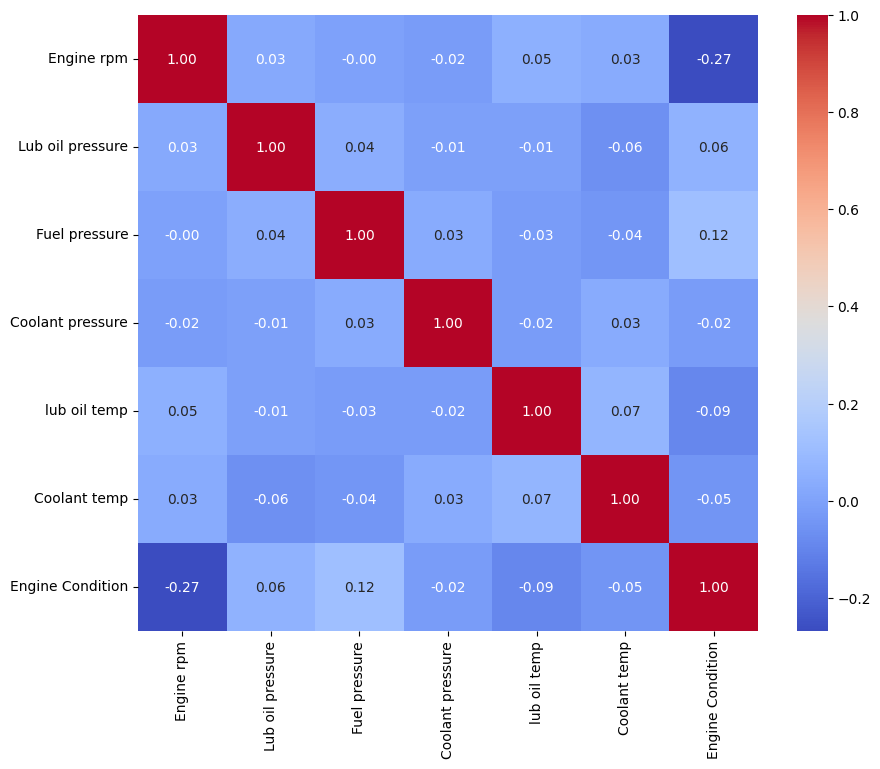

In [84]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

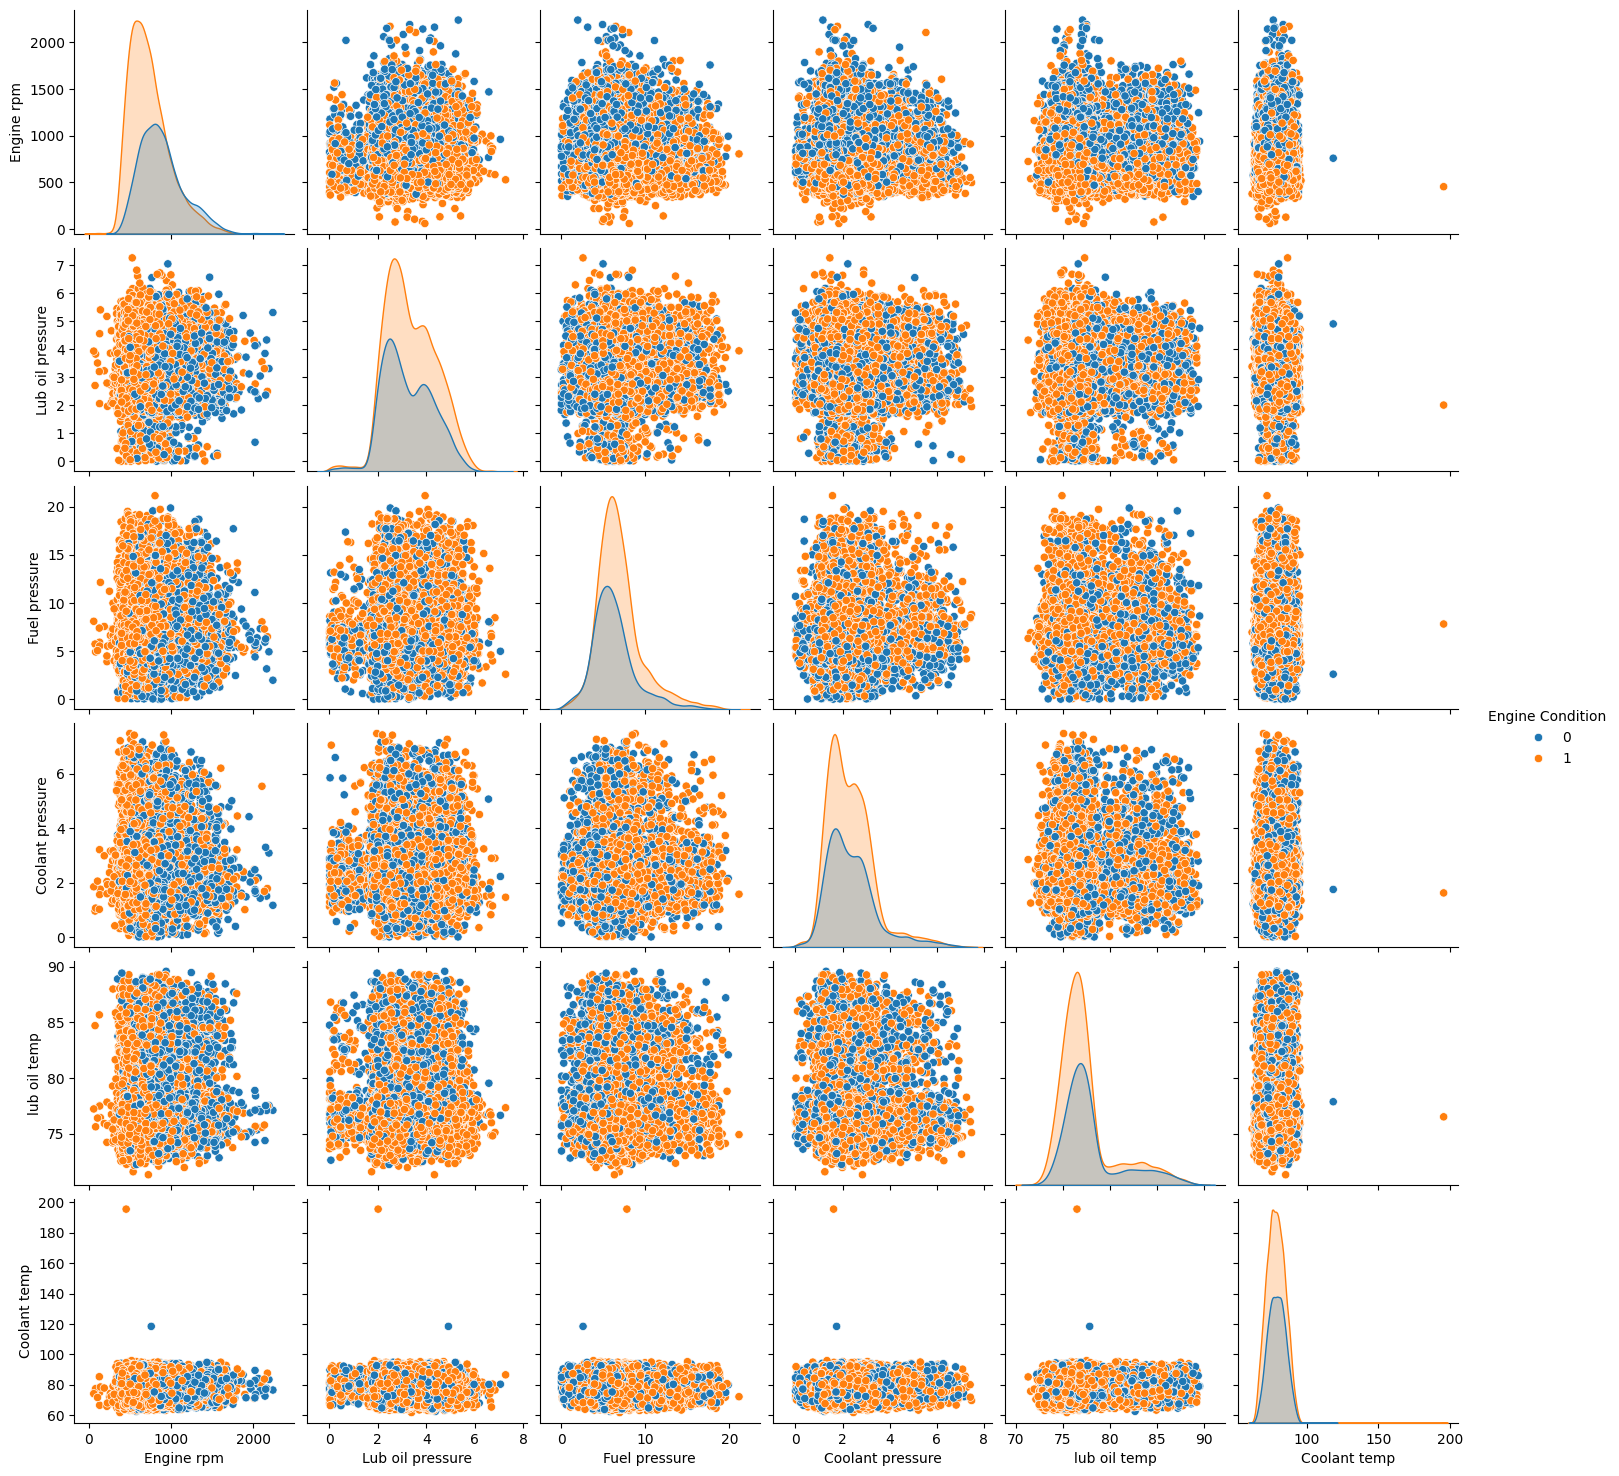

In [85]:
# Pairplot
sns.pairplot(df, hue="Engine Condition")
plt.show()

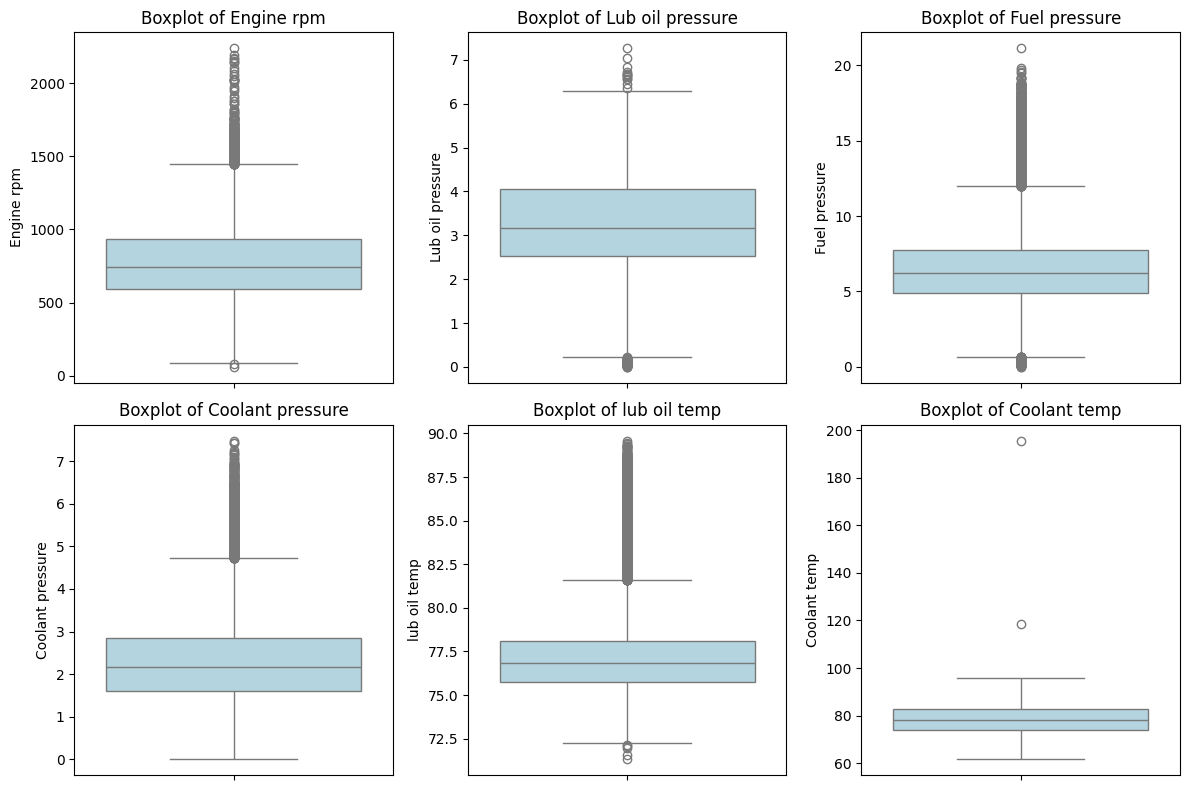

In [86]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 8))

features = ["Engine rpm", "Lub oil pressure", "Fuel pressure", "Coolant pressure", "lub oil temp", "Coolant temp"]
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature], color="lightblue")
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

# **Part B: Engine Condition Classification**

# Step 1: Feature Selection & Data splitting
- Separate features (X) and target variable (y).
- Split dataset into training (80%) and testing (20%).

In [87]:
# Define features (X) and target (y)
X = df.drop("Engine Condition", axis=1)
y = df["Engine Condition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Data Preprocessing
- **Remove missing values:** Since there is no missing value in the dataset, so no need to handle the missing values.
- **Normalize numerical features using StandardScaler:**
  -  Apply normalization/standardization to the training set.
  - Fit the scaler (like StandardScaler) only on the training data to prevent data leakage.
  - Transform both the training and testing sets using the fitted scaler.
  - Use the transform method to apply the same scaling learned from the training set to the test set.

In [88]:
# Apply normalization/standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 3: Train Classification Models

We train following models and select the best model to classify the engine condition as "Normal" or "Abnormal.":

- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)

In [89]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.56      0.28      0.37      1459
           1       0.67      0.87      0.76      2448

    accuracy                           0.65      3907
   macro avg       0.62      0.58      0.57      3907
weighted avg       0.63      0.65      0.61      3907

Random Forest Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1459
           1       0.69      0.80      0.74      2448

    accuracy                           0.64      3907
   macro avg       0.61      0.59      0.59      3907
weighted avg       0.63      0.64      0.63      3907

SVM Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.57      0.26      0.36      1459
           1       0.67      0.89      0.76      2448

    accuracy                           0.65      3907
   macro avg       0.62      0.57      0.56  

# Step 4: Hyperparameter Tuning & Model Optimization
We optimize four models:  
1. **Logistic Regression** - Tuned with `C`, `penalty`, and `solver`.  
2. **Random Forest** - Tuned with `n_estimators`, `max_depth`, and `min_samples_split`.  
3. **Support Vector Machine (SVM)** - Tuned with `C`, `kernel`, and `gamma`.  
4. **K-Nearest Neighbors (KNN)** - Tuned with `n_neighbors` and `weights`.  

We use **GridSearchCV** for optimal hyperparameters.

In [90]:
# Define hyperparameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Models dictionary
models = {
    "Logistic Regression": (LogisticRegression(), param_grid_lr),
    "Random Forest": (RandomForestClassifier(), param_grid_rf),
    "SVM": (SVC(), param_grid_svm),
    "KNN": (KNeighborsClassifier(), param_grid_knn)
}

# Train, tune and evaluate all models
best_models = {}
y_probas = {}
for name, (model, param_grid) in models.items():
    print(f"\nTraining {name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    y_pred = best_models[name].predict(X_test)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    #print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Cross-Validation Accuracy for {name}: {grid_search.best_score_:.2f}")

    # Check if the model has the predict_proba method
    if hasattr(best_models[name], 'predict_proba'):
        y_probas[name] = best_models[name].predict_proba(X_test)[:, 1]
    else:
        # For models like SVM with probability=False, we need to enable probability estimates
        y_probas[name] = best_models[name].decision_function(X_test)

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Cross-Validation Accuracy for Logistic Regression: 0.67
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.28      0.37      1459
           1       0.67      0.87      0.76      2448

    accuracy                           0.65      3907
   macro avg       0.62      0.58      0.57      3907
weighted avg       0.63      0.65      0.61      3907


Training Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Cross-Validation Accuracy for Random Forest: 0.67
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.34      0.42      1459
           1       0.68      0.84      0.75      2448

    accuracy                           0.65      3907
   macro avg       0

# Step 5: Model Performance Evaluation & Best Model Selection
We evaluate models using:
- **Classification Report** (Accuracy, Precision, Recall, F1-score  -> done as part of hyperparameter tuning)
- **ROC-AUC Curve** (Model discrimination capability)
- **Confusion Matrix** (Misclassifications)


The best model is selected based on **ROC-AUC Score**.

### **Classification Report (Accuracy, Precision, Recall, F1-score)**

**Model Parameters and Cross-Validation Accuracy**

| Model              | Best Parameters                                                    | Cross-Validation Accuracy |
|-------------------|---------------------------------------------------------------------|---------------------------|
| Logistic Regression | {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}                  | 0.67                      |
| Random Forest       | {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}    | 0.67                      |
| SVM                 | {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}                        | 0.67                      |
| KNN                 | {'n_neighbors': 9, 'weights': 'distance'}                          | 0.64                      |

---

**Logistic Regression - Classification Report**

| Metric     | Class 0 | Class 1 | Accuracy | Macro Avg | Weighted Avg |
|------------|---------|---------|----------|-----------|---------------|
| Precision  | 0.56    | 0.67    | 0.65     | 0.62      | 0.63          |
| Recall     | 0.28    | 0.87    |          | 0.58      | 0.65          |
| F1-Score   | 0.37    | 0.76    |          | 0.57      | 0.61          |
| Support    | 1459    | 2448    | 3907     | 3907      | 3907          |

---

**Random Forest - Classification Report**

| Metric     | Class 0 | Class 1 | Accuracy | Macro Avg | Weighted Avg |
|------------|---------|---------|----------|-----------|---------------|
| Precision  | 0.57    | 0.68    | 0.66     | 0.62      | 0.64          |
| Recall     | 0.34    | 0.85    |          | 0.59      | 0.66          |
| F1-Score   | 0.42    | 0.76    |          | 0.59      | 0.63          |
| Support    | 1459    | 2448    | 3907     | 3907      | 3907          |

---

**SVM - Classification Report**

| Metric     | Class 0 | Class 1 | Accuracy | Macro Avg | Weighted Avg |
|------------|---------|---------|----------|-----------|---------------|
| Precision  | 0.57    | 0.67    | 0.65     | 0.62      | 0.63          |
| Recall     | 0.26    | 0.89    |          | 0.57      | 0.65          |
| F1-Score   | 0.36    | 0.76    |          | 0.56      | 0.61          |
| Support    | 1459    | 2448    | 3907     | 3907      | 3907          |

---

**KNN - Classification Report**

| Metric     | Class 0 | Class 1 | Accuracy | Macro Avg | Weighted Avg |
|------------|---------|---------|----------|-----------|---------------|
| Precision  | 0.52    | 0.68    | 0.64     | 0.60      | 0.62          |
| Recall     | 0.39    | 0.78    |          | 0.59      | 0.64          |
| F1-Score   | 0.44    | 0.73    |          | 0.59      | 0.62          |
| Support    | 1459    | 2448    | 3907     | 3907      | 3907          |

### **ROC-AUC Curve (Model discrimination capability)**

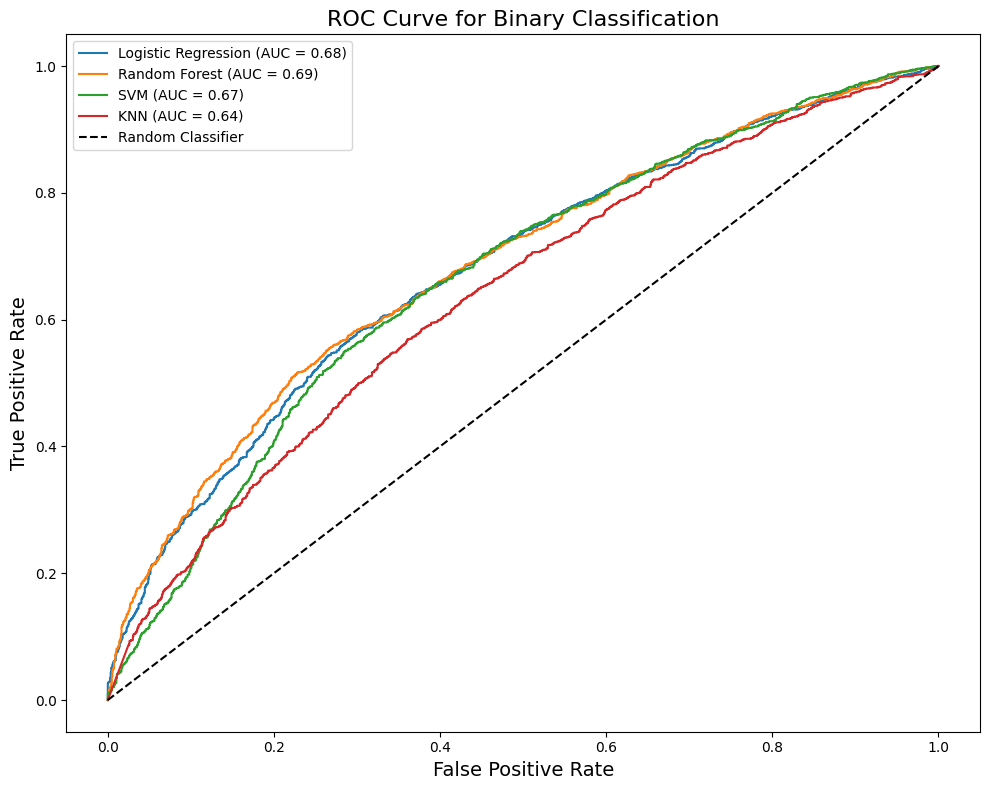


The best model based on ROC-AUC score is: Random Forest


In [91]:
# Prepare for plotting the ROC curves for all models
plt.figure(figsize=(10, 8))

# Store AUC scores for each model
roc_auc_scores = {}

# Loop through each model and plot its ROC curve
for model_name, y_proba in y_probas.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[model_name] = roc_auc  # Store AUC score
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")

# Add title and labels
plt.title("ROC Curve for Binary Classification", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)

# Add legend and show the plot
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Find the best model based on ROC-AUC score
best_model = max(roc_auc_scores, key=roc_auc_scores.get)

# Print the best model
print(f"\nThe best model based on ROC-AUC score is: {best_model}")

### **Confusion Matrix (Misclassifications)**

The confusion matrix engine condition classification model:

**Top-left:** True negatives (healthy engines correctly predicted)


**Bottom-right:** True positives (faulty engines correctly predicted)

**Top-right:** False positives (healthy predicted as faulty)

**Bottom-left**: False negatives (faulty predicted as healthy — critical to reduce)

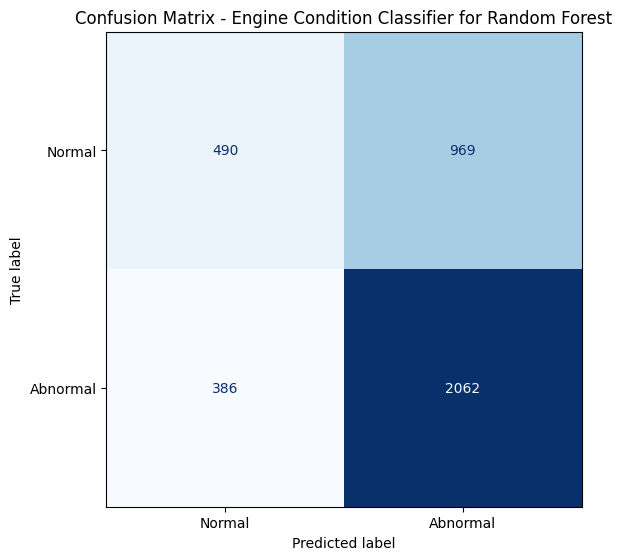

In [117]:
# Predict on test data
y_pred = best_models[best_model].predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['Normal', 'Abnormal']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title(f"Confusion Matrix - Engine Condition Classifier for {best_model}")
plt.tight_layout()
plt.show()

# Step 6: Classify the Engine condition
A function to classify engine condition given new sensor readings using the selected model.


In [113]:
# Function to classify engine condition
def classify_engine_condition(input_data):
    """Classifies engine condition as 'Normal' or 'Abnormal' using the best model.

    Args:
        input_data (dict): A dictionary containing sensor readings.

    Returns:
        str: The predicted engine condition ('Normal' or 'Abnormal').
    """

    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Scale the input data using the fitted scaler
    input_scaled = scaler.transform(input_df)

    # Make prediction using the best model
    prediction = best_models[best_model].predict(input_scaled)[0]

    # Return the predicted condition
    return "Normal" if prediction == 0 else "Abnormal"

# Example usage
example_data1 = {
    "Engine rpm": 1500,
    "Lub oil pressure": 4,
    "Fuel pressure": 6,
    "Coolant pressure": 3,
    "lub oil temp": 82,
    "Coolant temp": 79
}

example_data2 = {
    "Engine rpm": 1800,
    "Lub oil pressure": 38,
    "Fuel pressure": 53,
    "Coolant pressure": 12,
    "lub oil temp": 105,
    "Coolant temp": 98
}

# Classify engine condition for the examples
prediction1 = classify_engine_condition(example_data1)
prediction2 = classify_engine_condition(example_data2)

# Print the predictions
print(f"\nExample 1 Prediction: {prediction1}")
print(f"\nExample 2 Prediction: {prediction2}")


Example 1 Prediction: Normal

Example 2 Prediction: Abnormal


# **Part C: Parameter Relationship Analysis and Anomaly Detection:**
This code aims to predict **Lubricant Oil Pressure** using Random Forest Regression, XGBoost Regression and Multiple Linear Regression, compares their performance and detect anomalies in the engine data using theh best selected model for anomaly

# Data preparation

In [67]:
# Load dataset
df_reg = pd.read_csv("engine_data.csv")

# Feature & Target
X_reg = df_reg.drop(["Lub oil pressure", "Engine Condition"], axis=1, errors='ignore')
y_reg = df_reg["Lub oil pressure"]

# Scale Data
scaler_reg = StandardScaler()
X_scaled = scaler_reg.fit_transform(X_reg)

# Train-Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

# Training and Evaluating Models

In [68]:
# Models Dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')
}

# Model Evaluation Results
results = {}

for name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_reg)

    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_reg, y_pred_reg)

    results[name] = {
        'Model': model,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Compare Models
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                                                               Model  \
Linear Regression                                 LinearRegression()   
Random Forest      (DecisionTreeRegressor(max_features=1.0, rando...   
XGBoost            XGBRegressor(base_score=None, booster=None, ca...   

                        MAE       MSE      RMSE        R2  
Linear Regression  0.840972    1.0234  1.011632  0.005083  
Random Forest      0.853565  1.071317  1.035044   -0.0415  
XGBoost            0.866024   1.11871  1.057691 -0.087574  


# Selecting the Best Model and Detecting Anomalies:

In [69]:
# Select Best Model (Lowest RMSE)
best_model_name = results_df['RMSE'].idxmin()
best_model_reg = results[best_model_name]['Model']

print(f"\nBest Selected Model for Anomaly Detection: {best_model_name}")

# Train Best Model on Full Data
best_model_reg.fit(X_scaled, y)

# Predict Expected Value for Whole Data
df_reg['Predicted_Lub_Oil_Pressure'] = best_model_reg.predict(X_scaled)

# Residual Calculation
df_reg['Residual'] = abs(df_reg['Lub oil pressure'] - df_reg['Predicted_Lub_Oil_Pressure'])

# Define Threshold for Anomaly
threshold = df_reg['Residual'].mean() + 2 * df_reg['Residual'].std()
print(f"\nAnomaly Detection Threshold (Residual): {threshold}")

# Flag Anomalies
df_reg['Anomaly'] = df_reg['Residual'] > threshold

print("\nAnomalies Found in Existing Data:")
print(df_reg[df_reg['Anomaly'] != True])


Best Selected Model for Anomaly Detection: Linear Regression

Anomaly Detection Threshold (Residual): 1.9777415157949614

Anomalies Found in Existing Data:
       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0             700          2.493592      11.790927          3.178981   
1             876          2.941606      16.193866          2.464504   
2             520          2.961746       6.553147          1.064347   
3             473          3.707835      19.510172          3.727455   
5            1221          3.989226       6.679231          2.214250   
...           ...               ...            ...               ...   
19530         902          4.117296       4.981360          4.346564   
19531         694          4.817720      10.866701          6.186689   
19532         684          2.673344       4.927376          1.903572   
19533         696          3.094163       8.291816          1.221729   
19534         504          3.775246       3.962480 

# Anomaly Detection on new sensor data
Function to predict & Detect Anomaly on new sensor data using the best selected model

In [70]:
def detect_lubrication_anomaly(engine_data, actual_lub_oil_pressure, scaler, best_model, threshold):
    """
    Detects anomalies in engine lubrication system using sensor data.

    Args:
        engine_data (dict): A dictionary containing engine sensor readings
                           (Engine rpm, Fuel pressure, Coolant pressure,
                            Lub oil temp, Coolant temp).
        actual_lub_oil_pressure (float): The actual measured lubricant oil pressure.
        scaler (sklearn.preprocessing.StandardScaler): The scaler used for data preprocessing.
        best_model (sklearn.base.RegressorMixin): The trained regression model for prediction.
        threshold (float): The threshold for anomaly detection based on residual.

    Returns:
        str: A message indicating whether an anomaly is detected or not.
    """

    # Convert input data to DataFrame
    input_df = pd.DataFrame([engine_data])

    # Scale the input data
    input_scaled = scaler_reg.transform(input_df)

    # Predict Expected Lub Oil Pressure
    predicted_pressure = best_model_reg.predict(input_scaled)[0]

    # Residual Calculation
    residual = abs(actual_lub_oil_pressure - predicted_pressure)

    # Anomaly Check
    if residual > threshold:
        return "Anomaly Detected: Possible Lubrication System Issue"
    else:
        return "No Anomaly Detected: Lub Oil Pressure is Normal"



# No Anomaly Example usage:
engine_data = {
    "Engine rpm": 2400,
    "Fuel pressure": 54,
    "Coolant pressure": 14,
    "lub oil temp": 92,
    "Coolant temp": 85
}
actual_lub_oil_pressure = 3.2

anomaly_result = detect_lubrication_anomaly(engine_data, actual_lub_oil_pressure, scaler, best_model, threshold)
print(anomaly_result)


# Anomaly Example usage:
engine_data = {
    "Engine rpm": 2400,
    "Fuel pressure": 54,
    "Coolant pressure": 14,
    "lub oil temp": 92,
    "Coolant temp": 85
}
actual_lub_oil_pressure = 6.9

anomaly_result = detect_lubrication_anomaly(engine_data, actual_lub_oil_pressure, scaler, best_model, threshold)
print(anomaly_result)

No Anomaly Detected: Lub Oil Pressure is Normal
Anomaly Detected: Possible Lubrication System Issue


## Conclusion

In this project, we implemented multiple regression models to predict *Lub Oil Pressure* based on engine parameters for the purpose of *Anomaly Detection*.

---

### Key Insights from Data Analysis:

- *Lub Oil Pressure* is almost constant across all ~19,000 records:
    - Mean = ~3.30
    - Standard Deviation = ~0.21

- Correlation of input features with Lub Oil Pressure is negligible:
  
| Feature            | Correlation with Lub Oil Pressure |
|-------------------|----------------------------------|
| Fuel Pressure     | +0.04 (Very Weak)                |
| Engine RPM        | +0.02 (Very Weak)                |
| Lub Oil Temp      | -0.008 (Negligible)              |
| Coolant Pressure  | -0.009 (Negligible)              |
| Coolant Temp      | -0.06 (Very Weak Negative)       |


---

### Model Performance Observation:

- Tried models:
    - Multiple Linear Regression
    - Random Forest Regression
    - XGBoost Regression

- All models predicted almost the same value (close to mean) due to low variance and weak feature-target relationship.

- Hyperparameter tuning did not improve results because:
    - No learnable pattern exists in the data. Hence we have excluded this step from the notebook.

---

### Final Conclusion & Recommendation:

- In such scenarios, complex machine learning models are not required.

- A simple regression model works as a *dynamic threshold generator* for anomaly detection.

- The anomaly detection logic should compare:
  
  > *Predicted Lub Oil Pressure* vs *Actual Lub Oil Pressure*

- If the deviation exceeds a defined threshold → Flag it as a potential anomaly.

---

**Key Takeaway:**  
When target variable shows low variance and weak correlation with features — focus on *simple models* and *threshold-based anomaly detection*, rather than complex machine learning pipelines.

# **Part D: Final Conclusion**

# Project Summary

This project aimed to develop a system for predictive maintenance of automotive engines using machine learning. It addressed two key problems:
- Engine condition classification
- Anomaly detection in lubricant oil pressure

---

## Exploratory Data Analysis (EDA)

- **Data Quality:**  
  - The dataset was loaded and inspected for missing values and duplicates.  
  - No missing values or duplicates were found, indicating good data quality for analysis.

- **Data Distribution:**  
  - Histograms were used to visualize the distribution of each feature.  
  - This provided insights into the range and frequency of values for each parameter.

- **Feature Relationships:**  
  - A correlation heatmap was generated to identify relationships between features.  
  - Notably, lubricant oil pressure showed minimal correlation with other engine parameters.  
  - This suggested that predicting it accurately might be challenging.

- **Outlier Detection:**  
  - Box plots were used to identify potential outliers in the data.  
  - **While some outliers were observed, they were not removed as they could represent real-world scenarios.**

---

## Engine Condition Classification

- **Model Selection:**  
  Several classification models were trained and evaluated:
  - Logistic Regression
  - Random Forest Classifier
  - Support Vector Machine (SVM)
  - K-Nearest Neighbors (KNN)

- **Hyperparameter Tuning:**  
  - Used `GridSearchCV` to optimize model hyperparameters for better performance.

- **Performance Evaluation:**  
  - Models were evaluated using:
    - Accuracy
    - Precision
    - Recall
    - F1-Score
    - ROC-AUC score
- **Best Model:**
  - The best model selected as **Random Forest** based on the highest ROC-AUC score for engine condition classification.
  - This model showed good discrimination between **Normal** and **Abnormal** engine conditions.


---

## Anomaly Detection in Lubricant Oil Pressure (Regression Approach)

- **Model Selection:**  
  Different regression models were used to predict Lubricant Oil Pressure:
  - Multiple Linear Regression
  - Random Forest Regression
  - XGBoost Regression

- **Key Observations from Analysis:**
  - The target variable *Lub oil pressure* was found to be almost constant across all records.
  - Standard Deviation was just 1.02
  - Correlation of Lub oil pressure with other features was negligible or very weak.

- **Reason for Similar Performance Across Models:**  
  - Due to the constant nature of Lub oil pressure and negligible correlation with features, all models mostly predicted the mean value (≈3.30).
  - Thus, advanced models or hyperparameter tuning did not add significant improvement.

---

## Anomaly Detection Logic

- For a new incoming data point:
  - Predict Lub oil pressure using the best-performing regression model.
  - Compare predicted value with actual measured value.
  - If deviation exceeds a defined threshold, flag it as an anomaly.

---

## Final Conclusion

- Engine classification models performed reasonably well after tuning and evaluation.
- Lub oil pressure anomaly detection using regression faced inherent challenges due to:
  - Very low variance in target variable.
  - Negligible correlation with other features.
- This use case is more suited for a rule-based anomaly detection approach rather than complex machine learning models due to the static behavior of Lub oil pressure.